<a href="https://colab.research.google.com/github/jeya2050/find-number-plate-using-detecto-and-read-it-using-OCR/blob/main/detecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!pip install imutils

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils
import easyocr
import torch

In [18]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/new_plates.zip"
with ZipFile(file_name,"r") as zip:
  zip.extractall()
  print("Done")

Done


In [20]:
import os 
path="/content/new_plates 2"
location_of_data=os.listdir(path)
location_of_data

['27.jpeg',
 '36.png',
 '22.png',
 '5.xml',
 '4.png',
 '4.xml',
 '15.xml',
 '7.png',
 '42.xml',
 '40.png',
 '40.xml',
 '9.png',
 '23.xml',
 '10.xml',
 '30.jpeg',
 '3.png',
 '35.png',
 '26.xml',
 '8.xml',
 '33.png',
 '25.png',
 '23.jpeg',
 '18.xml',
 '41.png',
 '15.png',
 '17.jpeg',
 '37.xml',
 '14.jpeg',
 '20.png',
 '13.jpeg',
 '11.png',
 '30.xml',
 '.DS_Store',
 '39.xml',
 '31.jpeg',
 '17.xml',
 '12.xml',
 '24.xml',
 '10.png',
 '28.xml',
 '19.xml',
 '32.jpeg',
 '3.xml',
 '38.xml',
 '27.xml',
 '1.xml',
 '14.xml',
 '11.xml',
 '20.xml',
 '8.png',
 '21.png',
 '9.xml',
 '29.jpeg',
 '7.xml',
 '25.xml',
 '33.xml',
 '16.jpeg',
 '42.png',
 '36.xml',
 '41.xml',
 '16.xml',
 '13.xml',
 '39.png',
 '21.xml',
 '35.xml',
 '34.png',
 '6.xml',
 '38.png',
 '2.png',
 '28.jpeg',
 '18.jpeg',
 '22.xml',
 '34.xml',
 '19.png',
 '24.png',
 '32.xml',
 '1.png',
 '29.xml',
 '6.png',
 '2.xml',
 '31.xml',
 '5.png',
 '26.jpg',
 '12.png',
 '37.png']

In [21]:
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import matplotlib.pyplot as plt
from detecto.utils import read_image

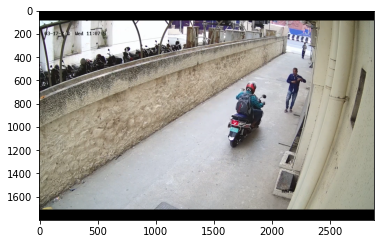

In [23]:
base_path="/content/new_plates 2/"
sample_image="39.png"
image=read_image(base_path+sample_image)
plt.imshow(image)

In [24]:
from detecto.core import Dataset
dataset=Dataset(base_path)

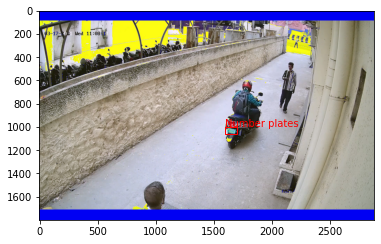

In [25]:
from detecto.visualize import show_labeled_image
image,targets=dataset[28]
show_labeled_image(image,targets["boxes"],targets["labels"])

In [28]:
from detecto.core import DataLoader,Model
labels=["Number plates"]
model=Model(labels)

In [29]:
model.fit(dataset)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 42/42 [00:20<00:00,  2.04it/s]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 42/42 [00:13<00:00,  3.13it/s]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 42/42 [00:16<00:00,  2.51it/s]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 42/42 [00:14<00:00,  2.82it/s]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 42/42 [00:13<00:00,  3.08it/s]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 42/42 [00:13<00:00,  3.07it/s]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 42/42 [00:14<00:00,  2.92it/s]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 42/42 [00:14<00:00,  2.86it/s]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 42/42 [00:14<00:00,  2.98it/s]


In [150]:
image=read_image(base_path+"15.png")

In [151]:
labels,boxes,scores=model.predict(image)

In [152]:
print("labels:",labels)
print("boxes:",boxes)
print("scores:",scores)

labels: ['Number plates']
boxes: tensor([[1100.7030, 1181.3304, 1351.6215, 1322.0824]])
scores: tensor([0.9834])


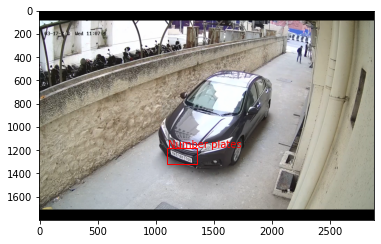

In [153]:
from detecto.visualize import show_labeled_image
show_labeled_image(image,boxes,labels)

In [154]:
boxes=boxes.to(torch.int32)

In [155]:
boxes

tensor([[1100, 1181, 1351, 1322]], dtype=torch.int32)

In [156]:
cropped=image[boxes[0][1]:boxes[0][2],boxes[0][0]:boxes[0][3]]

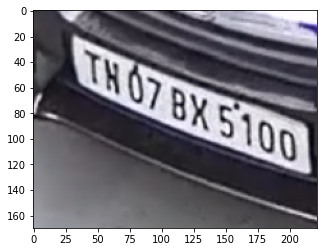

In [157]:
plt.imshow(cropped)

In [158]:
reader = easyocr.Reader(['en'], gpu=True)  #English

In [159]:
results = reader.readtext(cropped, detail=1, paragraph=False)

In [160]:
results

[([[40.51683491303632, 19.023399604274083],
   [223.90874452251472, 93.04909137521966],
   [206.48316508696368, 131.9766003957259],
   [23.09125547748527, 57.95090862478034]],
  'Ikoz BX51001',
  0.1224481693381158)]